In [6]:
import itertools
import math
import statistics as stat

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

In [2]:
data = pd.read_csv("data/height_weight.csv")
data["Height(cm)"] = round(data["Height(Inches)"]*2.54, 2)
data["Weight(Kg)"] = round(data["Weight(Pounds)"]*0.4535924, 2)
heights = data["Height(cm)"]
weights = data["Weight(Kg)"]
data.head()

,Index,Height(Inches),Weight(Pounds),Height(cm),Weight(Kg)
0,1,65.78331,112.9925,167.09,51.25
1,2,71.51521,136.4873,181.65,61.91
2,3,69.39874,153.0269,176.27,69.41
3,4,68.21660,142.3354,173.27,64.56
4,5,67.78781,144.2971,172.18,65.45


# Descriptive Statistics

In [7]:
data.describe()

,Index,Height(Inches),Weight(Pounds),Height(cm),Weight(Kg)
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421,172.702519,57.642282
std,7217.022701,1.901679,11.660898,4.830288,5.289287
min,1.000000,60.278360,78.014760,153.110000,35.390000
25%,6250.750000,66.704397,119.308675,169.430000,54.120000
50%,12500.500000,67.995700,127.157750,172.710000,57.680000
75%,18750.250000,69.272958,134.892850,175.950000,61.190000
max,25000.000000,75.152800,170.924000,190.890000,77.530000


In [4]:
np.median(heights)
stat.mode(heights)
np.min(heights)

# range
np.ptp(heights) # peak to peak
np.max(heights) - np.min(heights)
np.max(heights)
np.mean(heights)

172.70251880000004

In [ ]:
import statistics as stat

stat.mean(heights) # Arithmetic mean (“average”) of data.
stat.fmean() # Fast, floating point arithmetic mean.
stat.geometric_mean() # Geometric mean of data.
stat.harmonic_mean() # Harmonic mean of data.
stat.median(heights) # Median (middle value) of data.
stat.median_low(heights) # Low median of data.
stat.median_high(heights) # High median of data.
stat.median_grouped(heights) # Median, or 50th percentile, of grouped data.
stat.mode(heights) # Single mode (most common value) of discrete or nominal data.
stat.multimode( [2, 3, 4, 2])  # List of modes (most common values) of discrete or nominal data.
stat.quantiles() # Divide data into intervals with equal probability.

In [14]:
## Pandas
heights.mean() 	      
heights.std() 	
heights.min() 	
heights.prod() 	
heights.cumsum() 	
heights.cumprod() 	
heights.median() 	
heights.abs() 	
heights.max() 	
heights.mode() 	
heights.sum() 	            
heights.count() 	       

/home/mz/micromamba/envs/py/lib/python3.11/site-packages/numpy/core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
/home/mz/micromamba/envs/py/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


25000

## std, var, cov

In [5]:
# population variance
np.var(heights)
stat.pvariance(heights)  # Population variance of data.

# population standard deviation
np.std(heights)
stat.pstdev(heights)  # Population standard deviation of data.

# sample variance
np.var(heights, ddof=1)
stat.variance(heights)  # Sample variance of data.

# sample std
np.std(heights, ddof=1)
stat.stdev(heights)  # Sample standard deviation of data.

# covariance
np.cov(heights, weights)[0, 1]

# correlation
np.corrcoef(heights, weights)[0, 1]

0.5028506474478229

## percentile

In [6]:
np.percentile(heights, 25) # 25% of the heights is under this point, 75% over
np.percentile(heights, 75) # 
np.percentile(heights, 100) # max
np.percentile(heights, 0) # min
np.percentile(heights, 50) # median: np.median(heights)

172.71

In [7]:
data["Height(cm)"].describe().round(2)

count    25000.00
mean       172.70
std          4.83
min        153.11
25%        169.43
50%        172.71
75%        175.95
max        190.89
Name: Height(cm), dtype: float64

## inter quartile range

In [8]:
iqr = np.percentile(heights, 75) - np.percentile(heights, 25) # 175.95 - 169.43
iqr

6.519999999999982

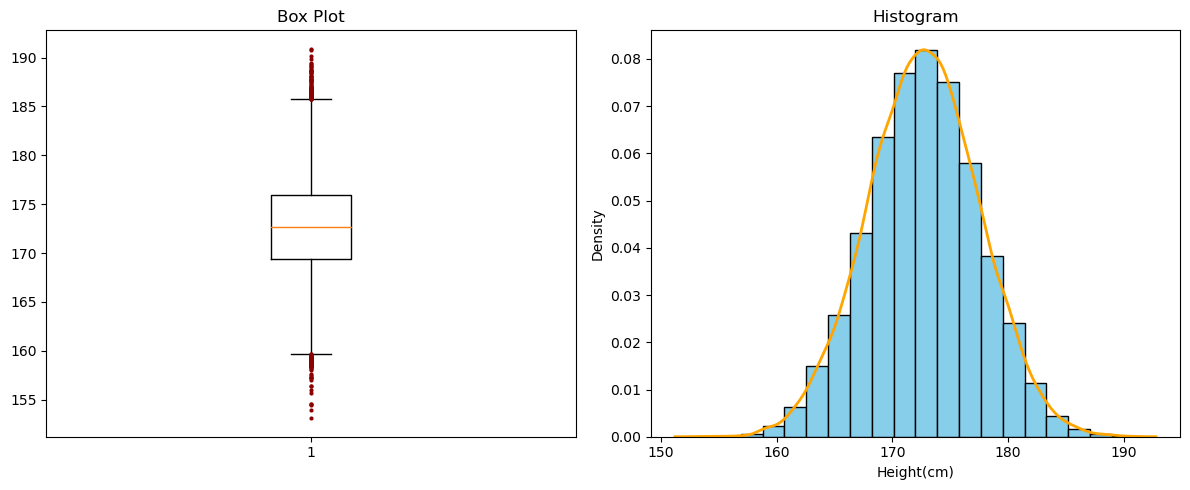

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

flierprops = dict(marker='.', markerfacecolor='darkred', markersize=6, markeredgecolor='none')

axes[0].boxplot(heights, flierprops=flierprops)
axes[0].set_title("Box Plot")

sns.histplot( heights, stat='density', ax=axes[1],
    facecolor="skyblue", bins=20, )

sns.kdeplot(heights, color='orange', lw=2, ax=axes[1])

axes[1].set_title("Histogram")
plt.tight_layout()
plt.show()

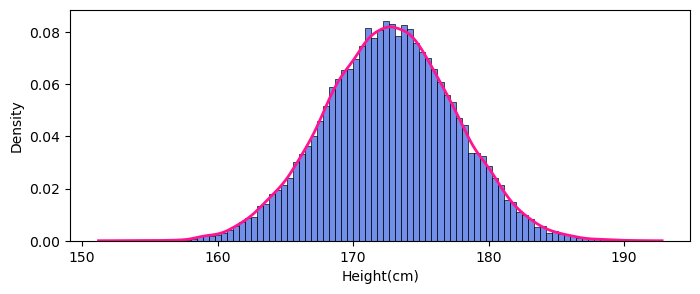

In [12]:
plt.figure(figsize=(8, 3))
sns.histplot(heights, stat='density', color='royalblue')
sns.kdeplot(heights, color='deeppink', lw=2)

plt.show()

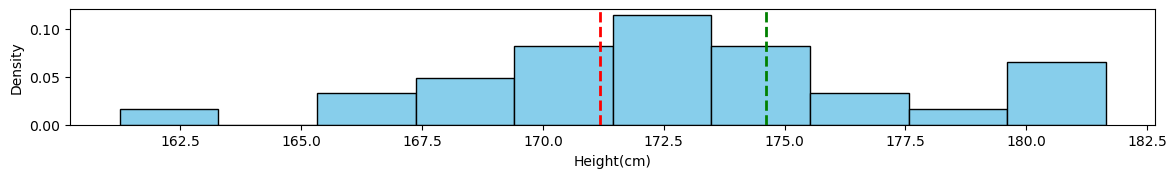

In [5]:
from stats_functions import confidence_interval

sample = heights[:30] # small sample to see margins of the confidence interval
lower_margin, upper_margin = confidence_interval(sample, .95)

plt.figure(figsize=(14, 1.5))
sns.histplot(sample, stat='density', facecolor="skyblue", bins=10)

# Add vertical lines for confidence interval
plt.axvline(lower_margin, color='red', linestyle='dashed', linewidth=2, label='Lower Bound (95% CI)')
plt.axvline(upper_margin, color='green', linestyle='dashed', linewidth=2, label='Upper Bound (95% CI)')
plt.show()

# Measures in detail

<img src="https://upload.wikimedia.org/wikipedia/commons/3/33/Visualisation_mode_median_mean.svg" width=260 height=250 />

### Arithmetic mean
${\displaystyle A={\frac {1}{n}}\sum _{i=1}^{n}a_{i}={\frac {a_{1}+a_{2}+\cdots +a_{n}}{n}}}$
- Useful to characterize symmetric distributions without outliers 
- the arithmetic mean is greatly influenced by outliers and thus not **robust**
- for skewed distributions the a. mean diviates from the mode and modus<br>

In [ ]:
def my_amean (num: list) -> float:
    sum = 0
    for numbers in num:
        sum += numbers
    amean = sum / len(num)
    return amean

my_amean([3,5,6,9])

5.75

### Median
$\tilde x
=\begin{cases}
  x_{m+1}                     & \text { for odd n = 2m+1}\\
  \frac{1}{2} (x_m + x_{m+1}) & \text { for even n = 2m}
\end{cases}
$
- Exact **middle value among a dataset**.
- The median $\tilde x$ is the **value splitting the higher half from the lower half** of a data sample.<br>
- **Useful for skewed distribution or data with outliers.**
- The basic feature of the median in describing data compared to the mean $\overline x$ is that it is not skewed by a small proportion of extremely large or small values, and therefore provides a better representation of a "typical" value. 
- The median is  the **most resistant / robust statistic** 


In [ ]:
def my_median (num: list) -> float:
    '''number that resides in the middle of a sorted list of  numbers'''
    ls = sorted(num)
    lg = len(num)
    m = lg/2
    if lg%2 == 1:
        med = ls[int(m)]
    else:
        med = (ls[int(m-1)]+ls[int(m)])/2
    return med

my_median([10,17,20, 22, 25, 34, 37, 48, 59])

25

## Mode
- The mode is the value that appears most often in a set of data values.<br>
- The numerical value of the mode is the same as that of the mean and median in a normal distribution, and it may be very different in highly skewed distributions. <br>


In [ ]:
import statistics as stat
stat.mode([2, 3, 4, 2])
stat.multimode([2, 3, 3, 4, 2]) # if there's more than one mode

[2, 3]

In [ ]:
def my_mode(ls):
    ''' mode that allows for more than one mode value'''
    # count - counts elements in an iterable
    # map - goes ove every element in iterable
    # filter - picks items for wich the filter criteria is true
    most = max(list(map(ls.count, ls)))
    return list(set(filter(lambda x: ls.count(x) == most, ls)))

my_mode([2,3,5, 5, 5, 2, 3, 8])
my_mode([1, 2, 2, 3, 3])


[2, 3]

In [ ]:
def my_modus(num: list) -> float:
    ''' mode that allows for more than one mode value'''
    freq = {}                             # build a dict, that lists the existing vakues and their frequencies
    for x in num:
        h = num.count(x)          # count frequency of value x
        freq[x] = h                     # add value x and it's frequency to the dict

    value_list = list(freq.values())    # make two lists of the same lenght out of
    key_list = list(freq.keys())          # dictionaries keys and values

    maximum = 0                         # find max frequency
    for y in value_list:
        if  y > maximum:
            maximum = y

    position = value_list.index(maximum)    # take position of max frequency to extract corresponding key
    return key_list[position]


my_modus([1, 2, 3])
my_mode([1, 2, 2, 3, 3])


[2, 3]

## Geometric Mean
- Useful for averaging ratios. (growth of figures, population growth, interest rates)
- Always less than arithmetic mean

The geometric mean is one of the three classical Pythagorean means, together with the arithmetic mean and the harmonic mean. For all positive data sets containing at least one pair of unequal values, the harmonic mean is always the least of the three means, while the arithmetic mean is always the greatest of the three and the geometric mean is always in between (see Inequality of arithmetic and geometric means.) 

$\left(\prod _{i=1}^{n}x_{i}\right)^{\frac {1}{n}}={\sqrt[{n}]{x_{1}x_{2}\cdots x_{n}}}$

In [ ]:
from scipy.stats import gmean
gmean([1.0, 0.00001, 10000000000.])

46.415888336127786

In [ ]:
from statistics import geometric_mean
geometric_mean([1.0, 0.00001, 10000000000.])

46.415888336127786

In [ ]:
def my_geomean(ls: list) -> float:
    '''mean or average, which indicates the central tendency or 
    typical value of a set of numbers by using the product of their value'''
    growthfactors = []

    for index in range(1, len(ls)):          # range fct spits out the indexes
        g_fact = ls[index]/ls[index-1]
        growthfactors.append(g_fact)         # create a list

    prod = 1                                 # product of list instead of product()
    for fact in  growthfactors:
        prod *= fact

    geo_mean = prod**(1/2)
    return geo_mean


my_geomean([2, 3, 5, 5, 5, 2, 3, 8])


2.0

## Harmonic Mean
The harmonic mean is one of the Pythagorean means. <br>
It is sometimes appropriate for situations when the average rate is desired. 

The harmonic mean can be expressed as the reciprocal of the arithmetic mean of the reciprocals of the given set of observations. As a simple example, the harmonic mean of 1, 4, and 4 is 

$\left(\frac{1^{-1} + 4^{-1} + 4^{-1}}{3}\right)^{-1} = \frac{3}{\frac{1}{1} + \frac{1}{4} + \frac{1}{4}} = \frac{3}{1.5} = 2$

$\frac {n}{\frac{1}{x_1}+\frac{1}{x_2}+\frac{1}{x_3}+…+\frac{1}{x_n}}$

In many situations involving rates and ratios, the harmonic mean provides the correct average.

The weighted harmonic mean is the preferable method for averaging multiples, such as the price–earnings ratio. If these ratios are averaged using a weighted arithmetic mean, high data points are given greater weights than low data points. The weighted harmonic mean, on the other hand, correctly weights each data point.


If a set of [[weight function|weights]] $w_1 ..., w_n$ is associated to the dataset $x_1, ..., x_n$, the '''weighted harmonic mean''' is defined by 

  $H = \frac{\sum\limits_{i=1}^n w_i}{\sum\limits_{i=1}^n \frac{w_i}{x_i}}
    = \left( \frac{\sum\limits_{i=1}^n w_i x_i^{-1}}{\sum\limits_{i=1}^n w_i} \right)^{-1}$

The unweighted harmonic mean can be regarded as the special case where all of the weights are equal.

In [ ]:
def my_harmonic_mean(ls: list) -> float:
    sum = 0
    for x in ls:
        sum += 1/x
    mean = sum / len(ls)
    hmean = 1/mean
    return hmean

In [ ]:
growth = (100, 103, 104, 134, 145)
print(my_harmonic_mean(growth))

114.46005782930303


In [ ]:
import statistics as stats

stats.harmonic_mean([100, 103, 104, 134, 145])
stats.harmonic_mean([40, 60], weights=[5, 30]) # with weights

114.46005782930303